In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import catboost as cb
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import tqdm

In [102]:
df_train = pd.read_excel('train.xlsx')
df_test = pd.read_excel('test.xlsx')
df_result = pd.read_excel('result.xlsx')

In [118]:
df_train.fillna(-1, inplace = True)
delta = 300

In [105]:
df_train

,well id,"depth, m",bk,GZ1,GZ2,GZ3,GZ4,GZ5,GZ7,DGK,NKTD,NKTM,NKTR,ALPS,lith,goal
0,12.0,3042.4630,0.455779,0.774000,0.774000,0.332846,0.476545,0.774000,0.244898,0.123651,0.774000,0.799167,0.174639,0.727789,NK,0.0
1,33.0,2412.8305,-1.000000,0.157153,0.755472,0.453216,0.715147,-1.000000,0.523432,0.388729,0.519233,0.799167,0.563573,0.111216,ARGILLIT,0.0
2,33.0,2522.5575,-1.000000,0.172235,0.941742,0.525711,0.668600,-1.000000,0.588924,0.515214,0.527139,0.799167,0.551152,0.172359,ARGILLIT,0.0
3,49.0,2396.3625,0.381248,0.246838,0.116913,0.732654,0.151299,0.165219,0.656955,0.445917,0.575175,0.799167,0.429433,0.253563,ARGILLIT,0.0
4,49.0,2399.0475,0.356867,0.226241,0.155473,0.613300,0.173949,0.297194,0.773218,0.392743,0.575725,0.799167,0.447169,0.959633,ARGILLIT,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465091,287.0,2217.3625,-1.000000,0.213477,0.121747,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.442153,-1.000000,-1.000000,0.712853,ARGILLIT,0.0
465092,287.0,2217.4520,-1.000000,0.215987,0.122570,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.444390,-1.000000,-1.000000,0.676591,ARGILLIT,0.0
465093,287.0,2217.5415,-1.000000,0.215987,0.119374,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.445926,-1.000000,-1.000000,0.718157,ARGILLIT,0.0
465094,287.0,2217.6310,-1.000000,0.215987,0.118723,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.447813,-1.000000,-1.000000,0.759722,ARGILLIT,0.0


In [119]:
features = list()

for min_depth in tqdm.tqdm_notebook(range(1000, int(max(df_train["depth, m"])), delta)):
    df = df_train[(df_train["depth, m"] > min_depth) & (df_train["depth, m"] < min_depth + delta)]
    
    target = df["goal"]
    train = df.drop(['goal', 'lith', 'well id'], axis = 1)
    #train = train.drop(["lith", axis = 1)
    #train = train.drop("well id", axis = 1)

    X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.33)
    
    #scaler = preprocessing.StandardScaler()
    #scaler.fit(X_train.reshape([1,13]))

    #X_train = scaler.transform(X_train)
    #X_test = scaler.transform(X_test)

    clf = cb.CatBoostClassifier(random_seed=42, logging_level='Silent')
    clf = clf.fit(X_train, y_train)

    data_outputs = clf.predict(X_test)

    importances = clf.feature_importances_
    
    features.append(importances[1:])
    

    print(f1_score(y_test, data_outputs))
    
features = np.array(features)

0.9312515739108538
0.8902382064455862
0.9007572738142686
0.8098055790363483
0.7850698987673025
0.7714695634351302
0.7741403026134801
0.7714285714285715


In [115]:
train

,"depth, m",bk,GZ1,GZ2,GZ3,GZ4,GZ5,GZ7,DGK,NKTD,NKTM,NKTR,ALPS
0,3042.4630,0.455779,0.774,0.774000,0.332846,0.476545,0.774000,0.244898,0.123651,0.774000,0.799167,0.174639,0.727789
32,3042.3735,0.453569,0.774,0.774000,0.318596,0.464720,0.774000,0.273393,0.695538,0.774000,0.797342,0.172693,0.714954
36,3042.2840,0.451366,0.774,0.663254,0.343478,0.452898,0.774000,0.319765,0.154565,0.774000,0.795583,0.171322,0.727129
194,3042.1945,0.449664,0.774,0.584781,0.289582,0.441462,0.774000,0.337300,0.131379,0.774000,0.783272,0.171855,0.735778
244,3042.1050,0.447954,0.774,0.563861,0.274816,0.432253,0.759114,0.372444,0.247325,0.774000,0.779576,0.172289,0.744428
...,...,...,...,...,...,...,...,...,...,...,...,...,...
328527,3032.3495,-1.000000,-1.000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.668370,-1.000000,-1.000000,0.527425
328528,3032.4390,-1.000000,-1.000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.663189,-1.000000,-1.000000,0.496825
328529,3032.5285,-1.000000,-1.000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.659973,-1.000000,-1.000000,0.452543
328530,3032.6180,-1.000000,-1.000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.656766,-1.000000,-1.000000,0.482643


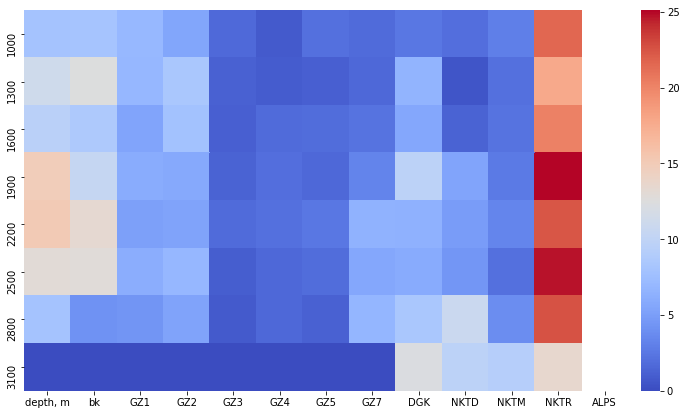

In [120]:
plt.figure(figsize=(13,7))
sns.heatmap(features, cmap='coolwarm', xticklabels=train.columns,
                                       yticklabels=range(1000, int(max(df_train["depth, m"])), delta))

In [23]:
df_train['depth, m'].sort_values().dropna()

430206     969.5
430205     969.5
430204     969.5
430203     969.5
430202     969.5
           ...  
315026    3156.0
97080     3156.0
315031    3156.0
315028    3156.0
315030    3156.0
Name: depth, m, Length: 463897, dtype: float16